In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.DataFrame(
    {
        'From': 
        [
            'Moscow',
            'Moscow',
            'St. Petersburg',
            'St. Petersburg',
            'St. Petersburg',
        ],
        'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
        'Is_Direct': [False, True, False, False, True],
        'Has_luggage': [True, False, False, True, False],
        'Price': [21202, 19250, 19301, 20168, 31425],
        'Date_From': 
        [
            '01.07.2019',
            '01.07.2019',
            '04.07.2019',
            '05.07.2019',
            '05.07.2019',
        ],
        'Date_To': 
        [
            '07.07.2019',
            '07.07.2019',
            '10.07.2019',
            '09.07.2019',
            '11.07.2019',
        ],
        'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
        'Travel_time_from': [995, 230, 605, 365, 255],
        'Travel_time_to': [350, 225, 720, 355, 250],
    }
)

#### 1. Выберите строки с выгодной ценой за авиабилет. Выгодными считаются те билеты, которые дешевле самого дорогого билета более чем в 1,5 раза.

In [24]:
df[df['Price'].max() > df['Price'] * 1.5]

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.2019,07.07.2019,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,05.07.2019,09.07.2019,Swiss,365,355


#### 2.  Выберите строки, где значения столбца Travel_time_from больше или равны 365 или значения Travel_time_to меньше 250. 

In [25]:
df.query('Travel_time_from >= 365 or Travel_time_from < 250')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21202,01.07.2019,07.07.2019,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.2019,07.07.2019,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,05.07.2019,09.07.2019,Swiss,365,355


#### 3. Выберите строки, где:
- полёт с пересадкой;
- прилёт до 8 июля (ни 9, ни 10, ни 11 июля).

In [31]:
df[df['Date_To'].isin(['07.07.2019']) & (df['Is_Direct'] == False)] 

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21202,01.07.2019,07.07.2019,Belavia,995,350


#### 4. Итак, нужно разобраться с аномалиями в выборке. Для начала найдите АЗС с самыми большими значениями в столбце time_spent.

In [84]:
data = pd.read_csv('data/visits.csv', sep='\t')
data

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк
...,...,...,...,...
317099,20180408T053133,9cdb5039,11.0,Гейхера
317100,20180403T021353,9cdb5039,181.0,Гейхера
317101,20180408T062636,9cdb5039,252.0,Гейхера
317102,20180405T232425,9cdb5039,29.0,Гейхера


In [75]:
data.sort_values('time_spent', ascending=False).head(10)

,date_time,id,time_spent,name
114797,20180402T055708,3c1e4c52,28925.0,Василёк
27147,20180406T080254,4b5f2af5,28519.0,Немезия
60547,20180408T000002,cf1ba8a5,28292.0,Василёк
19042,20180408T204208,5410e876,23696.0,Василёк
118597,20180408T165020,3c1e4c52,21184.0,Василёк
118058,20180402T111333,3c1e4c52,20359.0,Василёк
114406,20180408T083722,3c1e4c52,19886.0,Василёк
132164,20180405T160745,627ea5e3,19445.0,Левкой
281360,20180406T180459,d0c0928d,18614.0,Пион
165326,20180402T230204,3af3bb71,18569.0,Агератум


#### 5. Шесть из десяти самых долгих заездов произошли на станции под номером 3c1e4c52. Аналитик данных непременно спросит: «А как распределение времени, проведённого на этой АЗС, соотносится с распределением времени заездов в целом?» Нужно проверить. Для этого сделайте срез данных и извлеките всю информацию о станции 3c1e4c52.
Сделайте срез data по АЗС с id == "3c1e4c52" и сохраните результат в переменную sample.
Выведите на экран число заездов на эту АЗС.

In [76]:
sample = data[data['id'] == '3c1e4c52']
sample

,date_time,id,time_spent,name
112900,20180408T140822,3c1e4c52,55.0,Василёк
112901,20180404T120827,3c1e4c52,113.0,Василёк
112902,20180405T155422,3c1e4c52,2683.0,Василёк
112903,20180403T134959,3c1e4c52,14.0,Василёк
112904,20180405T050229,3c1e4c52,353.0,Василёк
...,...,...,...,...
118709,20180404T040613,3c1e4c52,179.0,Василёк
118710,20180404T213235,3c1e4c52,1604.0,Василёк
118711,20180404T091754,3c1e4c52,37.0,Василёк
118712,20180404T101710,3c1e4c52,13.0,Василёк


#### 6. Нужно сравнить распределение времени пребывания на станции 3c1e4c52 с распределением времени пребывания на всех АЗС. Если они сильно различаются, возможно, станция 3c1e4c52 представляет собой статистический выброс.
Методом hist() постройте две гистограммы распределения значений в столбце time_spent: одну для объекта data, вторую — для sample. Не забудьте использовать plt.show() после каждого вызова hist().
Для обеих гистограмм задайте одинаковые аргументы: range — от 0 до 1500, bins — 100.

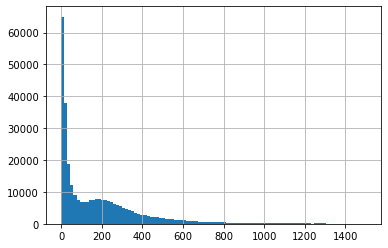

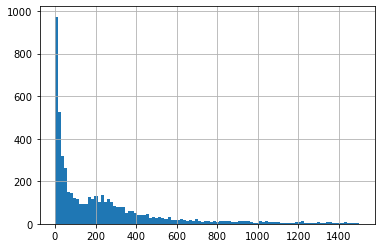

In [77]:
data['time_spent'].hist(bins=100, range=(0, 1500))
plt.show()

sample['time_spent'].hist(bins=100, range=(0, 1500))
plt.show()

#### 7. Причиной коротких заездов может быть то, что водители нечаянно заезжают на АЗС, которые не работают по ночам. Если это действительно так, то вы увидите связь между короткими заездами и временем прибытия. Чтобы проверить эту гипотезу, измените тип столбца date_time на более удобный тип для даты.
- Методом pd.to_datetime() переведите значения столбца date_time в таблице data в объекты datetime. 
- В параметре format= укажите строку, соответствующую текущему формату date_time, с помощью специальных обозначений.

In [85]:
data['date_time'] = pd.to_datetime(data['date_time'],  format='%Y%m%dT%H%M%S')
data

,date_time,id,time_spent,name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк
...,...,...,...,...
317099,2018-04-08 05:31:33,9cdb5039,11.0,Гейхера
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера
317101,2018-04-08 06:26:36,9cdb5039,252.0,Гейхера
317102,2018-04-05 23:24:25,9cdb5039,29.0,Гейхера


#### 8. Напомним, что в датафрейме записано время UTC. Московское рассчитывают как UTC + 3 часа.
Создайте столбец data['local_time'] и сохраните в нём сдвинутое на 3 часа время из столбца data['date_time'].

In [86]:
data['local_time'] =  data['date_time'] + pd.Timedelta(hours=3)
data.head()

,date_time,id,time_spent,name,local_time
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49


#### 9. Данные, связанные со временем, лучше округлять до той величины, которой будет достаточно для детального анализа. Чтобы проанализировать взаимосвязь между временем прибытия на АЗС и продолжительностью заезда, точность до минут и секунд не нужна. Округлите время до часов.

In [87]:
data['date_hour'] = data['local_time'].dt.round('1H')
data

,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00
...,...,...,...,...,...,...
317099,2018-04-08 05:31:33,9cdb5039,11.0,Гейхера,2018-04-08 08:31:33,2018-04-08 09:00:00
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера,2018-04-03 05:13:53,2018-04-03 05:00:00
317101,2018-04-08 06:26:36,9cdb5039,252.0,Гейхера,2018-04-08 09:26:36,2018-04-08 09:00:00
317102,2018-04-05 23:24:25,9cdb5039,29.0,Гейхера,2018-04-06 02:24:25,2018-04-06 02:00:00


#### 10. Пользуясь данными sample, постройте график зависимости продолжительности заправки от времени заезда. За основу возьмите соответствующие столбцы time_spent и local_time. Оси X присвойте значения столбца local_time, а оси Y — значения столбца time_spent.
Проверьте, всё ли верно отображено на графике:
- Каждый элемент обозначен точкой.
- Диапазон оси Y указан от 0 до 1000.
- Добавлены сетки.
- Размер графика 12х6 дюймов.

In [89]:
sample = data[data['id'] == '3c1e4c52']
sample

,date_time,id,time_spent,name,local_time,date_hour
112900,2018-04-08 14:08:22,3c1e4c52,55.0,Василёк,2018-04-08 17:08:22,2018-04-08 17:00:00
112901,2018-04-04 12:08:27,3c1e4c52,113.0,Василёк,2018-04-04 15:08:27,2018-04-04 15:00:00
112902,2018-04-05 15:54:22,3c1e4c52,2683.0,Василёк,2018-04-05 18:54:22,2018-04-05 19:00:00
112903,2018-04-03 13:49:59,3c1e4c52,14.0,Василёк,2018-04-03 16:49:59,2018-04-03 17:00:00
112904,2018-04-05 05:02:29,3c1e4c52,353.0,Василёк,2018-04-05 08:02:29,2018-04-05 08:00:00
...,...,...,...,...,...,...
118709,2018-04-04 04:06:13,3c1e4c52,179.0,Василёк,2018-04-04 07:06:13,2018-04-04 07:00:00
118710,2018-04-04 21:32:35,3c1e4c52,1604.0,Василёк,2018-04-05 00:32:35,2018-04-05 01:00:00
118711,2018-04-04 09:17:54,3c1e4c52,37.0,Василёк,2018-04-04 12:17:54,2018-04-04 12:00:00
118712,2018-04-04 10:17:10,3c1e4c52,13.0,Василёк,2018-04-04 13:17:10,2018-04-04 13:00:00


<AxesSubplot:xlabel='date_time'>

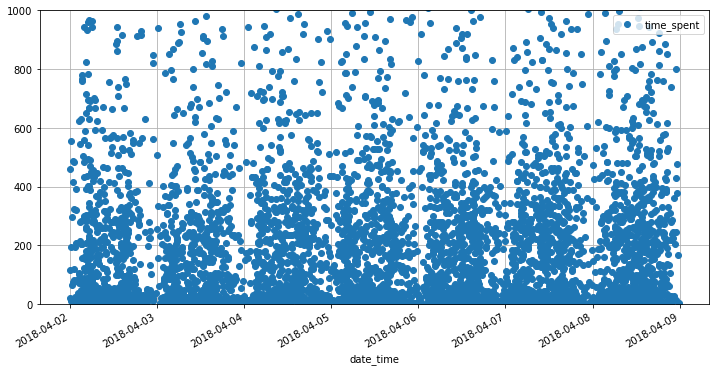

In [91]:
sample.plot(x='date_time', # столбец значений для горизонтальной оси
y='time_spent', # столбец значений для вертикальной оси
style='o', # стиль заполнения:'o'(точечный) или 'o-'(точечно-линейный)
ylim=(0, 1000), # границы по оси Y
figsize=(12, 6), # размеры картинки: (x_size, y_size)
grid=True) 

#### 11. Постройте сводную таблицу, которая будет отображать количество заездов по времени прибытия. Передайте параметру values значение поля time_spent.Из данных этой таблицы постройте график зависимости между временем прибытия (ось X) и количеством заездов в час (ось Y). Добавьте линии сетки, задайте размер графика 12х5 дюймов.

In [97]:
sample_pivot = sample.pivot_table(index='date_hour', values='time_spent', aggfunc='count')
sample_pivot

,time_spent
date_hour,
2018-04-02 03:00:00,9
2018-04-02 04:00:00,13
2018-04-02 05:00:00,14
2018-04-02 06:00:00,25
2018-04-02 07:00:00,56
...,...
2018-04-08 23:00:00,40
2018-04-09 00:00:00,23
2018-04-09 01:00:00,12


<AxesSubplot:xlabel='date_hour'>

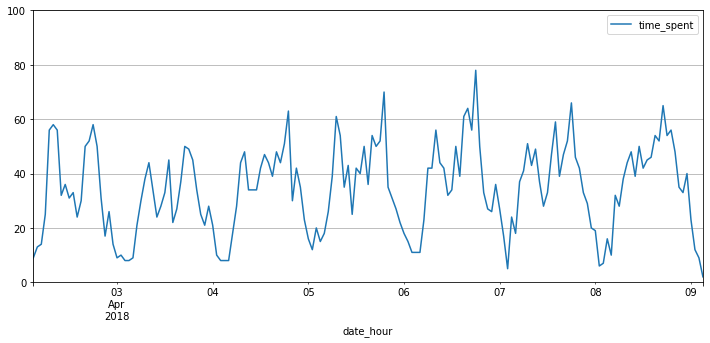

In [101]:
sample_pivot.plot(
style='-', # стиль заполнения:'o'(точечный) или 'o-'(точечно-линейный)
ylim=(0, 100), # границы по оси Y
figsize=(12, 5), # размеры картинки: (x_size, y_size)
grid=True) 

#### 12. Первым делом нужно создать переменную, чтобы выделить аномально быстрые заезды.
Добавьте в таблицу data столбец too_fast (пер. «слишком быстрый») со значениями:
True — если продолжительность заезда из столбца time_spent менее 60 секунд.
False — все остальные значения.

In [104]:
data['too_fast'] = data['time_spent'].apply(lambda x: True if x < 60 else False)
data

,date_time,id,time_spent,name,local_time,date_hour,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True
...,...,...,...,...,...,...,...
317099,2018-04-08 05:31:33,9cdb5039,11.0,Гейхера,2018-04-08 08:31:33,2018-04-08 09:00:00,True
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера,2018-04-03 05:13:53,2018-04-03 05:00:00,False
317101,2018-04-08 06:26:36,9cdb5039,252.0,Гейхера,2018-04-08 09:26:36,2018-04-08 09:00:00,False
317102,2018-04-05 23:24:25,9cdb5039,29.0,Гейхера,2018-04-06 02:24:25,2018-04-06 02:00:00,True


#### 13. Рассчитать процент всех заездов короче 60 секунд 

In [107]:
data['too_fast'].mean() * 100  #42%

42.21391089358696

#### 14. Переменная задана, процент посчитан, теперь можно группировать данные по АЗС. Для этого воспользуйтесь сводной таблицей.
Создайте переменную too_fast_stat и запишите в неё значения из сводной таблицы, сгруппировав доли быстрых заездов по АЗС.
Выведите на экран первые пять строк too_fast_stat.

In [112]:
too_fast_stat = data.pivot_table(index='name', values='too_fast', aggfunc='mean')
too_fast_stat.head(5)

,too_fast
name,
Агератум,0.254422
Амарант,0.514437
Аммобиум,0.340909
Арктотис,0.685301
Астильба,0.249489


#### 15. Теперь вы знаете, сколько быстрых заездов на первых пяти АЗС в процентном отношении. Но что делать дальше — выводить на экран остальные 466 строк и изучать значения для каждой АЗС? Слишком сложно.Гораздо лучше визуализировать распределение быстрых заездов сразу по всем АЗС. Гистограмма, вот что нужно!Постройте гистограмму распределения значений в таблице too_fast_stat на 30 корзин.

<AxesSubplot:>

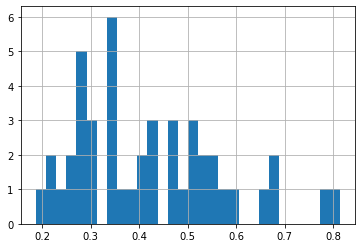

In [118]:
too_fast_stat['too_fast'].hist(bins=30)